## Import necessary module

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
import seaborn as sb

## Task  4 Question 1

### Reading data file

In [209]:
df=pd.read_csv(r'C:\Graduate Courses\Spring 2020\Homework_3\Game_1.csv',error_bad_lines=False)

In [210]:
df.columns

Index(['ID', 'Date', 'University', 'Is Home/Away?',
       'Is Opponent in AP Top 25 at Preseason?', 'Media', 'Label: Win/Lose'],
      dtype='object')

### Analzing the attribtes and column data labels

In [211]:
print(df['Is Home/Away?'].unique())

print(df['Is Opponent in AP Top 25 at Preseason?'].unique())

print(df['Media'].unique())

print(df['Label: Win/Lose'].unique())

['Home  ' 'Away  ']
['Out  ' 'In  ']
['1-NBC  ' '2-ESPN  ' '3-FOX  ' '4-ABC  ']
['Win' 'Lose']


In [212]:
print(list(df['Label: Win/Lose']))

['Win', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Win']


### Converting the strings into categorical data

In [213]:
df['Is Home/Away?'] = df['Is Home/Away?'].map({'Home  ':1, 'Away  ':2}).astype(int)
df['Is Opponent in AP Top 25 at Preseason?'] = df['Is Opponent in AP Top 25 at Preseason?'].map({'Out  ':2, 'In  ':1}).astype(int)
df['Media'] = df['Media'].map({'1-NBC  ':1, '2-ESPN  ':2, '3-FOX  ':3, '4-ABC  ':4}).astype(int)
df['Label: Win/Lose'] = df['Label: Win/Lose'].map({'Win': 1, 'Lose':2}).astype(int)

In [214]:
df

,ID,Date,University,Is Home/Away?,Is Opponent in AP Top 25 at Preseason?,Media,Label: Win/Lose
0,1,9/2/2017,Temple,1,2,1,1
1,2,9/9/2017,Georgia,1,1,1,2
2,3,9/16/2017,Boston College,2,2,2,1
3,4,9/23/2017,Michigan State,2,2,3,1
4,5,9/30/2017,Miami Ohio,1,2,1,1
5,6,10/7/2017,North Carolina,2,2,4,1
6,7,10/19/2017,USC,1,1,1,2
7,8,10/25/2017,North Carolina State,1,2,1,1
8,9,11/4/2017,Wake Forest,1,2,1,1
9,10,11/12/2017,Miami Florida,2,1,4,1


In [215]:
print(list(df['Is Opponent in AP Top 25 at Preseason?']))

[2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1]


### Spliting train and test data set

In [216]:
df_train=df[df["ID"]<=6]
df_test=df[df["ID"]>6]

x_train=df_train.filter(['Is Home/Away?', 'Is Opponent in AP Top 25 at Preseason?', 'Media'])

y_train=df_train['Label: Win/Lose']

x_test= df_test.filter(['Is Home/Away?', 'Is Opponent in AP Top 25 at Preseason?', 'Media'])


### Training the model: gini index and information gain 

In [220]:
#clf = DecisionTreeClassifier(criterion='entropy',max_depth=15, random_state=0)

clf = DecisionTreeClassifier(criterion='gini',max_depth=15, random_state=0)

clf.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(clf.score(x_train, y_train)))

Accuracy on training set: 1.000


### Checking Prediction Accuracy of the model

In [221]:
y_pred=clf.predict(x_test)
y_pred

array([2, 1, 1, 2, 1, 2])

### Ploting decision tree

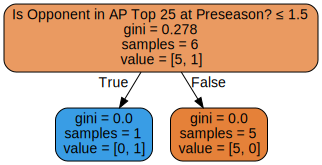

In [223]:
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Digraph
from sklearn import tree

from graphviz import Graph

dot_data = tree.export_graphviz(clf, out_file="tree1.dot", 
                      feature_names=['Is Home/Away?', 'Is Opponent in AP Top 25 at Preseason?', 'Media'],
                      filled=True, rounded=True,  
                      special_characters=True)  

with open("tree1.dot") as f:
    dot_data = f.read()

graph = graphviz.Source(dot_data)  

graph.render('test-output/round-table1.gv.png', view=True)  # doctest: +SKIP

graph 

## Task  4 Question 2

### Reading data file 

In [224]:
df=pd.read_csv(r'C:\Graduate Courses\Spring 2020\Homework_3\Play_data.csv',error_bad_lines=False)

In [225]:
df

,ID,Date,Outlook,Temperature,Humidity,Windy,Label: Play?
0,1,9/1/2017,Sunny,Hot,High,"""False""",No
1,2,9/8/2017,Sunny,Hot,High,"""True""",No
2,3,9/15/2017,Overcast,Hot,High,"""False""",Yes
3,4,9/22/2017,Rainy,Mild,High,"""False""",Yes
4,5,9/29/2017,Rainy,Cool,Normal,"""False""",Yes
5,6,10/1/2017,Rainy,Cool,Normal,"""True""",No
6,7,10/8/2017,Overcast,Cool,Normal,"""True""",Yes
7,8,10/15/2017,Sunny,Mild,High,"""False""",No
8,9,10/22/2017,Sunny,Cool,Normal,"""False""",Yes
9,10,10/29/2017,Rainy,Mild,Normal,"""False""",Yes


### Reading data labels and attributes

In [226]:
print(df['Outlook'].unique())
print(df['Temperature  '].unique())
print(df['Humidity  '].unique())
print(df['Windy  '].unique())
print(df['Label: Play?  '].unique())

['Sunny  ' 'Overcast  ' 'Rainy  ']
['Hot  ' 'Mild  ' 'Cool  ']
['High  ' 'Normal  ']
['"False"  ' '"True"  ']
['No  ' 'Yes  ' '0']


In [227]:
df.columns

Index(['ID ', 'Date', 'Outlook', 'Temperature  ', 'Humidity  ', 'Windy  ',
       'Label: Play?  '],
      dtype='object')

In [228]:
data_features_name = ['Outlook', 'Temperature  ', 'Humidity  ', 'Windy  ']

### Coverting the strings into categorical data

In [229]:
df['Outlook'] = df['Outlook'].map({'Sunny  ':1, 'Overcast  ':2, 'Rainy  ':3}).astype(int)
df['Temperature  '] = df['Temperature  '].map({'Hot  ':1, 'Mild  ':2, 'Cool  ':3}).astype(int)
df['Humidity  '] = df['Humidity  '].map({'High  ':1, 'Normal  ':2}).astype(int)
df['Windy  '] = df['Windy  '].map({'"False"  ':2, '"True"  ':1}).astype(int)
df['Label: Play?  '] = df['Label: Play?  '].map({'No  ':2, 'Yes  ':1,'0':0}).astype(int)

In [230]:
df

,ID,Date,Outlook,Temperature,Humidity,Windy,Label: Play?
0,1,9/1/2017,1,1,1,2,2
1,2,9/8/2017,1,1,1,1,2
2,3,9/15/2017,2,1,1,2,1
3,4,9/22/2017,3,2,1,2,1
4,5,9/29/2017,3,3,2,2,1
5,6,10/1/2017,3,3,2,1,2
6,7,10/8/2017,2,3,2,1,1
7,8,10/15/2017,1,2,1,2,2
8,9,10/22/2017,1,3,2,2,1
9,10,10/29/2017,3,2,2,2,1


In [231]:
print(list(df['Windy  ']))

[2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2]


### Test Train Split

In [232]:
df_train=df[df["ID "]<=14]

In [233]:
x_test=df[df["ID "]>14].filter(['Outlook', 'Temperature  ', 'Humidity  ', 'Windy  '])

In [234]:
x_train=df_train.filter(['Outlook', 'Temperature  ', 'Humidity  ', 'Windy  '])

In [235]:
x_train=df_train.filter(['Outlook', 'Temperature  ', 'Humidity  ', 'Windy  '])
y_train=df_train['Label: Play?  ']

### Developing the classification model

In [236]:

clf = DecisionTreeClassifier(criterion='entropy',max_depth=15, random_state=0) ## infromation gain

#clf = DecisionTreeClassifier(criterion='gini',max_depth=15, random_state=0) ##gini index


clf.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(clf.score(x_train, y_train)))

Accuracy on training set: 1.000


### Making prediction 

In [237]:
y_pred=clf.predict(x_test)
y_pred

array([1])

### Ploting decision tree

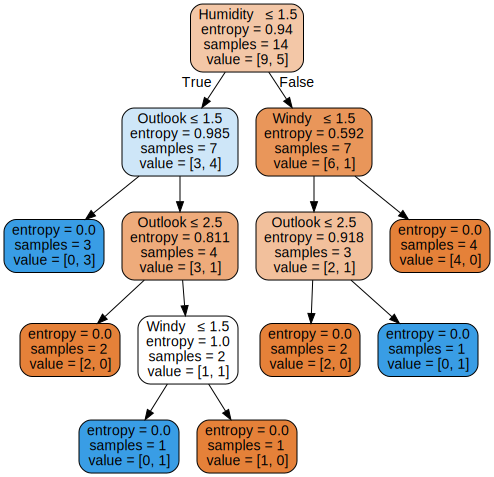

In [238]:
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Digraph
from sklearn import tree

from graphviz import Graph

dot_data = tree.export_graphviz(clf, out_file="tree1.dot", 
                      feature_names=data_features_name,
                      filled=True, rounded=True,  
                      special_characters=True)  

with open("tree1.dot") as f:
    dot_data = f.read()

graph = graphviz.Source(dot_data)  

graph.render('test-output/round-table1.gv.png', view=True)  # doctest: +SKIP

graph 

## Task 5

### Reading dataset

In [255]:
df=pd.read_csv(r'C:\Graduate Courses\Spring 2020\Homework_3\Game_data\Game.csv',error_bad_lines=False)

In [256]:
df

,ID,Date,Opponent,Is_Home_o r_Away,Is_Oppone nt_in_AP25 _Preseason,Media,Label
0,1,9/5/2015,Texas,Home,Out,1-NBC,Win
1,2,9/12/2015,Virginia,Away,Out,4-ABC,Win
2,3,9/19/2015,GeorgiaTec h,Home,In,1-NBC,Win
3,4,9/26/2015,UMass,Home,Out,1-NBC,Win
4,5,10/3/2015,Clemson,Away,In,4-ABC,Lose
5,6,10/10/2015,Navy,Home,Out,1-NBC,Win
6,7,10/17/2015,USC,Home,In,1-NBC,Win
7,8,10/31/2015,Temple,Away,Out,4-ABC,Win
8,9,11/7/2015,PITT,Away,Out,4-ABC,Win
9,10,11/14/2015,WakeForest,Home,Out,1-NBC,Win


In [257]:
df.columns

Index(['ID', 'Date', 'Opponent ', 'Is_Home_o r_Away',
       'Is_Oppone nt_in_AP25 _Preseason', 'Media', 'Label'],
      dtype='object')

In [258]:
print(list(df['Label']))

['Win ', 'Win ', 'Win ', 'Win ', 'Lose ', 'Win ', 'Win ', 'Win ', 'Win ', 'Win ', 'Win ', 'Lose ', 'Lose ', 'Win ', 'Lose ', 'Lose ', 'Win ', 'Lose ', 'Lose ', 'Win ', 'Lose ', 'Win ', 'Lose ', 'Lose ', 'Win ', 'Lose ', 'Win ', 'Win ', 'Win ', 'Win ', 'Win ', 'Win ', 'Win ', 'Lose ', 'Win ', 'Lose ']


In [259]:
data_features_name = ['Is_Home_o r_Away','Is_Oppone nt_in_AP25 _Preseason', 'Media']

In [260]:
print(df['Is_Home_o r_Away'].unique())

print(df['Is_Oppone nt_in_AP25 _Preseason'].unique())

print(df['Media'].unique())

print(df['Label'].unique())


['Home ' 'Away ']
['Out ' 'In ']
['1-NBC ' '4-ABC ' '3-FOX ' '2-ESPN ' '5-CBS ']
['Win ' 'Lose ']


### Data Processing/ feature Engineering 

In [261]:
df['Is_Home_o r_Away'] = df['Is_Home_o r_Away'].map({'Home ':1,'Away ':2}).astype(int)
df['Is_Oppone nt_in_AP25 _Preseason'] = df['Is_Oppone nt_in_AP25 _Preseason'].map({'Out ':0,'In ':1}).astype(int)
df['Media'] = df['Media'].map({'1-NBC ': 1, '4-ABC ':4, '3-FOX ':3, '2-ESPN ':2, '5-CBS ':5}).astype(int)
df['Label'] = df['Label'].map({'Win ': 1, 'Lose ':2}).astype(int)

In [274]:
print(list(df['Media']))

[1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 1, 3, 4, 1, 1, 1, 2, 4, 1, 1, 5, 1, 1, 4, 1, 1, 2, 3, 1, 4, 1, 1, 1, 4, 1, 4]


In [263]:
df

,ID,Date,Opponent,Is_Home_o r_Away,Is_Oppone nt_in_AP25 _Preseason,Media,Label
0,1,9/5/2015,Texas,1,0,1,1
1,2,9/12/2015,Virginia,2,0,4,1
2,3,9/19/2015,GeorgiaTec h,1,1,1,1
3,4,9/26/2015,UMass,1,0,1,1
4,5,10/3/2015,Clemson,2,1,4,2
5,6,10/10/2015,Navy,1,0,1,1
6,7,10/17/2015,USC,1,1,1,1
7,8,10/31/2015,Temple,2,0,4,1
8,9,11/7/2015,PITT,2,0,4,1
9,10,11/14/2015,WakeForest,1,0,1,1


### Saving the processed data

In [264]:
df.to_csv('game_df.csv')

In [265]:
np.array(df['Label'])

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2])

### Test Train split

In [266]:
train_df=df[df['ID']<=24]

In [267]:
train_df

,ID,Date,Opponent,Is_Home_o r_Away,Is_Oppone nt_in_AP25 _Preseason,Media,Label
0,1,9/5/2015,Texas,1,0,1,1
1,2,9/12/2015,Virginia,2,0,4,1
2,3,9/19/2015,GeorgiaTec h,1,1,1,1
3,4,9/26/2015,UMass,1,0,1,1
4,5,10/3/2015,Clemson,2,1,4,2
5,6,10/10/2015,Navy,1,0,1,1
6,7,10/17/2015,USC,1,1,1,1
7,8,10/31/2015,Temple,2,0,4,1
8,9,11/7/2015,PITT,2,0,4,1
9,10,11/14/2015,WakeForest,1,0,1,1


In [268]:
test_df=df[df['ID']>24]

In [269]:
X_train=train_df.filter(['Is_Home_o r_Away','Is_Oppone nt_in_AP25 _Preseason', 'Media'])
Y_train=train_df['Label']

### Model Development

In [270]:
#spliting data_set into test and train set and fit into decision Tree
clf = DecisionTreeClassifier(criterion='entropy',max_depth=15, random_state=0)
clf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, Y_train)))

Accuracy on training set: 0.750


### Model Accuracy 

In [271]:
X_test=test_df.filter(['Is_Home_o r_Away','Is_Oppone nt_in_AP25 _Preseason', 'Media'])
Y_test=test_df['Label']

In [272]:
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, Y_test)))
Y_pred=clf.predict(X_test)
print(Y_pred)

Accuracy on test set: 0.917
[1 1 1 1 1 1 1 1 1 2 1 2]


### Ploting the decision Tree

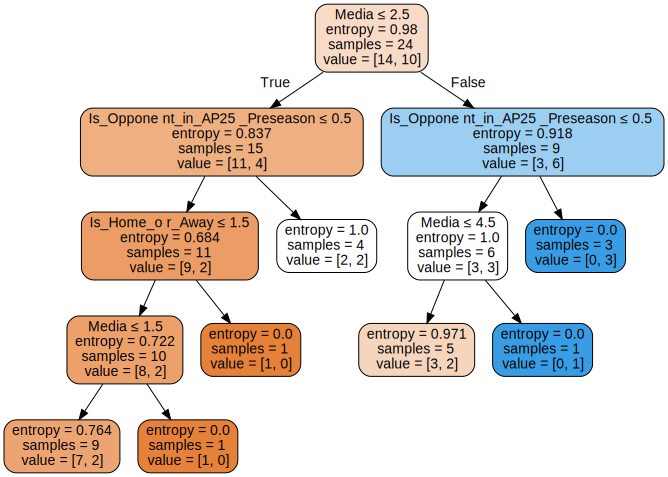

In [273]:
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Digraph
from sklearn import tree

from graphviz import Graph

dot_data = tree.export_graphviz(clf, out_file="tree2.dot", 
                      feature_names=data_features_name,
                      filled=True, rounded=True,  
                      special_characters=True)  

with open("tree2.dot") as f:
    dot_data = f.read()

graph = graphviz.Source(dot_data)  

graph.render('test-output/round-table2.gv.pdf', view=True)  # doctest: +SKIP

graph 


### Accuracy metrics estimation

In [138]:
from sklearn.metrics import classification_report

In [137]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.89      0.94         9

    accuracy                           0.92        12
   macro avg       0.88      0.94      0.90        12
weighted avg       0.94      0.92      0.92        12



## R CODE for ploting C4.5 Tree

In [ ]:
library("partykit")
library("party")
library("caret")
library("RWeka")

## Reading data for three different problems

data1<-data.frame("Top25"=c(2, 1, 2, 2, 2, 2),"Home_away"=c(1, 1, 2, 2, 1, 2), "Media"=c(1, 1, 2, 3, 1, 4),"label"=c('Win', 'Lose', 'Win', 'Win', 'Win', 'Win'))

data2<-data.frame("outlook"=c(1, 1, 2, 3, 3, 3, 2, 1, 1, 3, 1, 2, 2, 3),"windy"=c(2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1), "Humidity"=c(1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1), "temp"=c(1, 1, 1, 2, 3, 3, 3, 2, 3, 2, 2, 2, 1, 2),"label"=c('No  ', 'No  ', 'Yes  ', 'Yes  ', 'Yes  ', 'No  ', 'Yes  ', 'No  ', 'Yes  ', 'Yes  ', 'Yes  ', 'Yes  ', 'Yes  ', 'No  '))

data3<-data.frame("home_away"=c(1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2),"Media"=c(1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 1, 3, 4, 1, 1, 1, 2, 4, 1, 1, 5, 1, 1, 4) ,"Top_25"=c(0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1),"label"=c('Win ', 'Win ', 'Win ', 'Win ', 'Lose ', 'Win ', 'Win ', 'Win ', 'Win ', 'Win ', 'Win ', 'Lose ', 'Lose ', 'Win ', 'Lose ', 'Lose ', 'Win ', 'Lose ', 'Lose ', 'Win ', 'Lose ', 'Win ', 'Lose ', 'Lose '))

C45Fit1 <-J48(label ~., data= data1)

C45Fit2 <-J48(label ~., data= data2)

C45Fit3 <-J48(label ~., data= data3)

plot(C45Fit1)

plot(C45Fit2)

plot(C45Fit3)